Anthony Adungo Machine Learning Project.

# Project Description: 
The objective of this project is to analyze customer churn in the telecommunications industry using the "Telco Customer Churn" dataset from Kaggle. The dataset contains details of telecom customers, including demographic information, account details, and usage patterns. By leveraging this data, the goal is to build a predictive model to identify factors contributing to customer churn and develop strategies to retain valuable customers.

The data can be found at https://www.kaggle.com/datasets/blastchar/telco-customer-churn

# Key Objectives:

Data Exploration and Preprocessing: Perform exploratory data analysis (EDA) to understand the dataset's structure and clean it by handling missing values, outliers, and encoding categorical variables.
Feature Engineering: Create new features to improve model performance by identifying patterns in the customer behaviors and account details.
Model Development: Use machine learning algorithms (such as logistic regression, decision trees, random forests, or XGBoost) to build a churn prediction model. The model will predict whether a customer will churn based on the available features.
Model Evaluation: Assess the performance of the model using evaluation metrics such as accuracy, precision, recall, F1-score, and ROC-AUC to ensure it is robust and reliable.
Insights and Recommendations: Based on model predictions and analysis, generate actionable insights on how to reduce churn, targeting key factors that impact customer retention.
Tools and Technologies:

Python (Pandas, NumPy, Scikit-learn)
Jupyter Notebooks
Data Visualization (Matplotlib, Seaborn)
Machine Learning Algorithms (Logistic Regression, Decision Trees, Random Forests, XGBoost)
Expected Outcomes:

A trained predictive model capable of forecasting customer churn.
In-depth analysis of key features contributing to churn.
Strategic recommendations for improving customer retention in a telecom business.

# Part 1: Data Pre-processing

I) Importing the dataset and exploring its properties.

In [1]:
#Importing all the necessary libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
154,3077-RSNTJ,Female,0,Yes,Yes,6,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,19.70,113.5,No
3620,9373-WSLOY,Male,1,Yes,No,33,No,No phone service,DSL,No,...,Yes,Yes,Yes,No,Month-to-month,Yes,Electronic check,50.00,1750.85,No
975,2834-JRTUA,Male,0,No,No,71,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Electronic check,108.05,7532.15,Yes
1975,4703-MQYKT,Male,0,No,No,21,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.60,390.4,No
5232,1755-RMCXH,Male,0,Yes,Yes,2,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.30,40.25,No


In [3]:
df.shape

(7043, 21)

In [4]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
#Finding the statistical summary of the dataset.
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.0,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.0,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75


In [7]:
print(df.dtypes)

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object


In [8]:
#Finding the categorical variables.
df.select_dtypes(include='object').columns

Index(['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges',
       'Churn'],
      dtype='object')

In [9]:
len(df.select_dtypes(include='object').columns)

18

In [10]:
df.select_dtypes(include=['float64','int64']).columns

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges'], dtype='object')

In [11]:
len(df.select_dtypes(include=['float64','int64']).columns)

3

II) Dealing with missing values.

In [12]:
missing_data = df.isnull()
print(missing_data.head())
for column in missing_data.columns.values.tolist():
    print(column)
    print(missing_data[column].value_counts())
    print(" ")

   customerID  gender  SeniorCitizen  Partner  Dependents  tenure  \
0       False   False          False    False       False   False   
1       False   False          False    False       False   False   
2       False   False          False    False       False   False   
3       False   False          False    False       False   False   
4       False   False          False    False       False   False   

   PhoneService  MultipleLines  InternetService  OnlineSecurity  ...  \
0         False          False            False           False  ...   
1         False          False            False           False  ...   
2         False          False            False           False  ...   
3         False          False            False           False  ...   
4         False          False            False           False  ...   

   DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  \
0             False        False        False            False     False   


In [13]:
#Converting the Monthly charges column into float.
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [14]:
df['TotalCharges'].isnull().sum()

11

In [15]:
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].mean())

In [16]:
#Converting Tenure to int
df['tenure'] = df['tenure'].astype(int)

In [17]:
#dropping the customer id column.
dataset = df.drop(columns=['customerID'])

In [18]:
dataset.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


III) Feature Engineering.

In [19]:
for column in dataset.select_dtypes(include='object').columns.tolist():
    print(dataset[column].unique())

['Female' 'Male']
['Yes' 'No']
['No' 'Yes']
['No' 'Yes']
['No phone service' 'No' 'Yes']
['DSL' 'Fiber optic' 'No']
['No' 'Yes' 'No internet service']
['Yes' 'No' 'No internet service']
['No' 'Yes' 'No internet service']
['No' 'Yes' 'No internet service']
['No' 'Yes' 'No internet service']
['No' 'Yes' 'No internet service']
['Month-to-month' 'One year' 'Two year']
['Yes' 'No']
['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
['No' 'Yes']


In [20]:
print(df.select_dtypes(include='object').columns)

Index(['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')


In [21]:
#One hot encoding
dataset = pd.get_dummies(data=dataset,drop_first=True)

In [22]:
dataset.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,0,1,29.85,29.85,False,True,False,False,True,False,...,False,False,False,False,False,True,False,True,False,False
1,0,34,56.95,1889.50,True,False,False,True,False,False,...,False,False,False,True,False,False,False,False,True,False
2,0,2,53.85,108.15,True,False,False,True,False,False,...,False,False,False,False,False,True,False,False,True,True
3,0,45,42.30,1840.75,True,False,False,False,True,False,...,False,False,False,True,False,False,False,False,False,False
4,0,2,70.70,151.65,False,False,False,True,False,False,...,False,False,False,False,False,True,False,True,False,True


IV) Visualization.

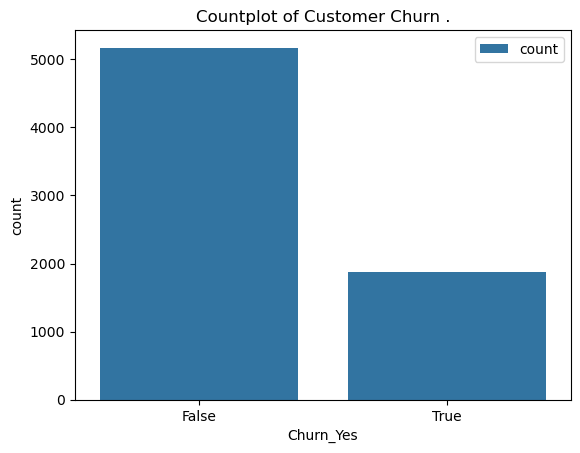

In [23]:
sns.countplot(dataset,x='Churn_Yes', label='count')
plt.title('Countplot of Customer Churn .')
plt.show()

In [24]:
#Count of customers who did not churn.
(dataset.Churn_Yes==0).sum()

5174

In [25]:
#Count of customers who churned.
(dataset.Churn_Yes==1).sum()

1869

V) Correlation matrix and heatmap.

In [26]:
dataset_2 = dataset.drop(columns='Churn_Yes')

<Axes: title={'center': 'Correlation with Churn_Yes'}>

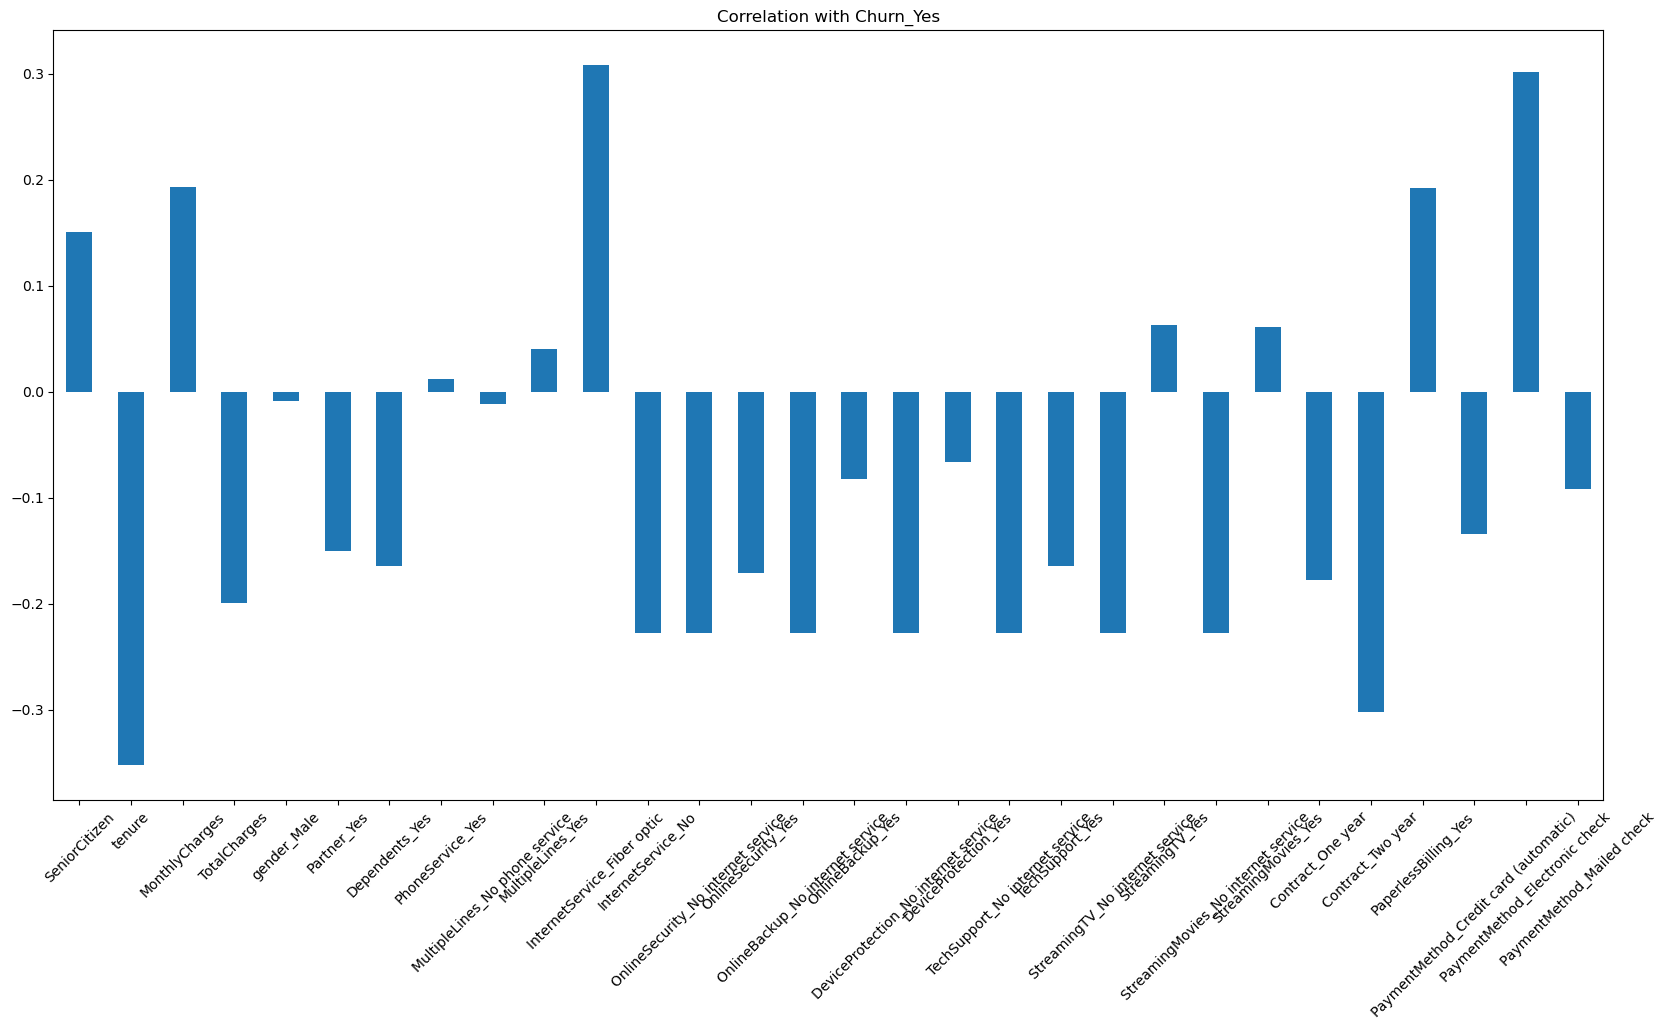

In [27]:
dataset_2.corrwith(dataset['Churn_Yes']).plot.bar(
    figsize=(20,10),
    title = 'Correlation with Churn_Yes',
    rot = 45)

In [28]:
corr = dataset.corr()

<Axes: >

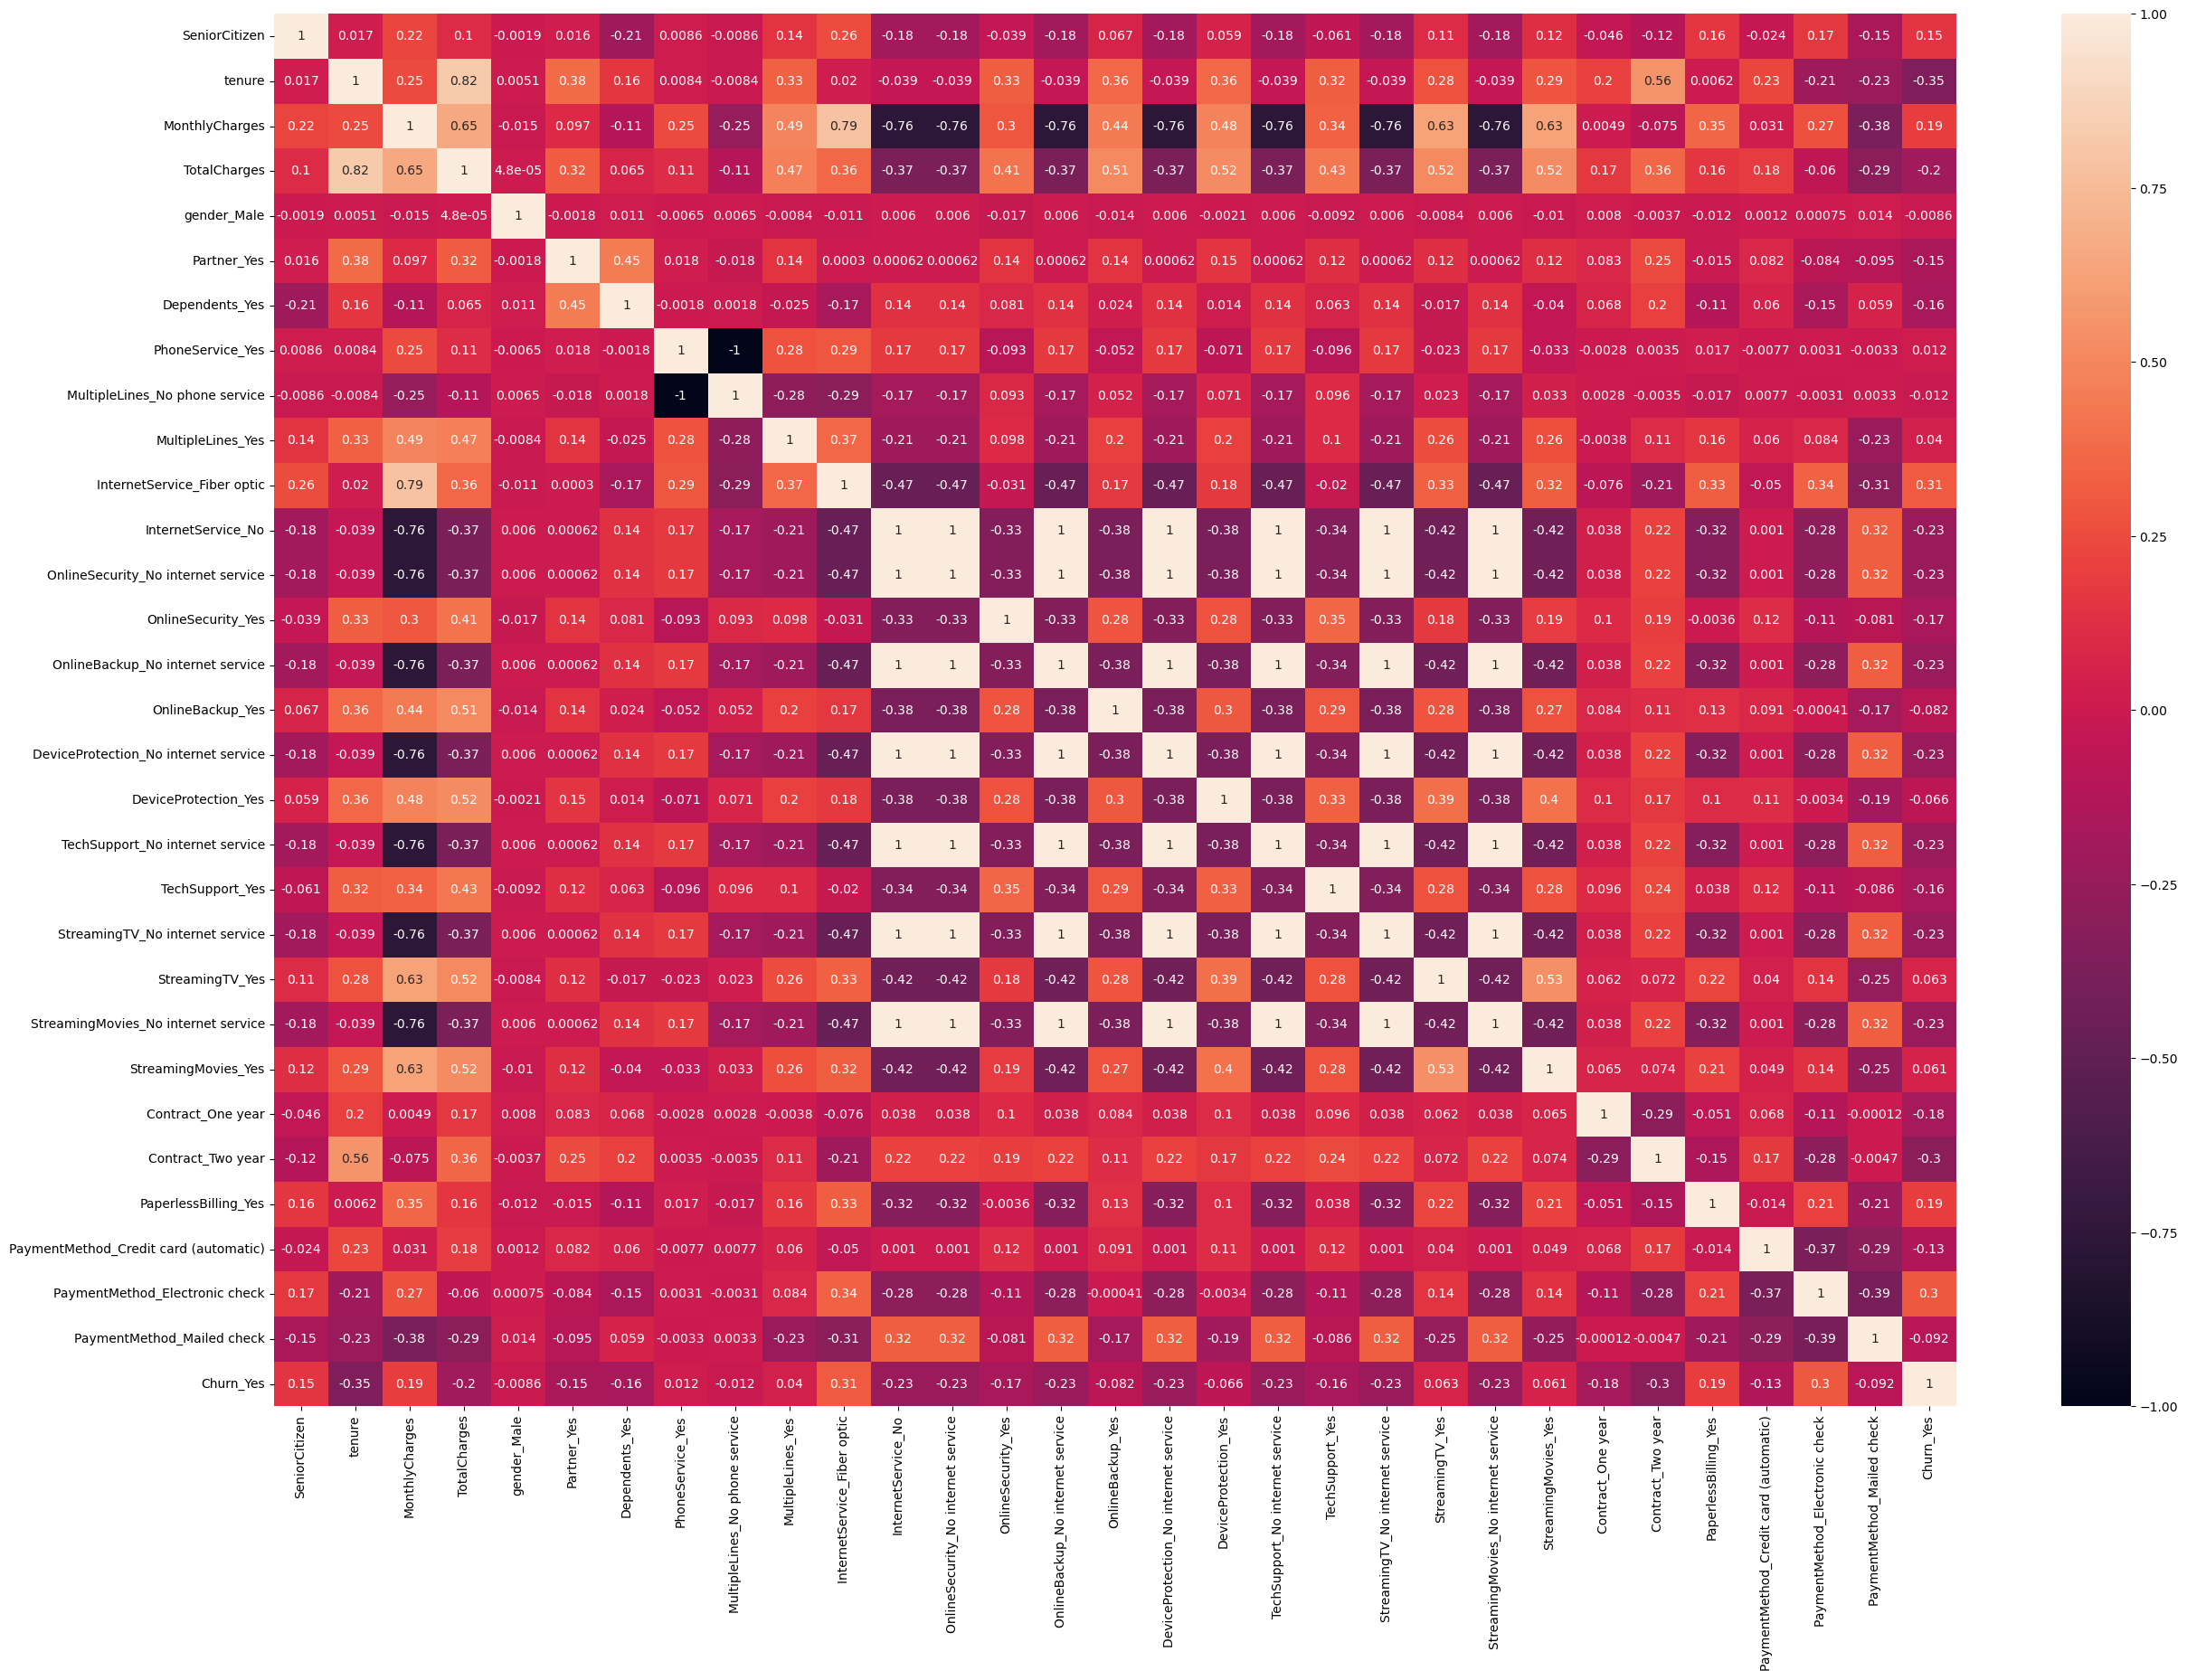

In [29]:
plt.figure(figsize=(30,20))
sns.heatmap(corr, annot= True)

VI) Splitting the dataset into train and test sets.

In [30]:
#Independent variable.
X = dataset.iloc[:,1:-1].values

In [31]:
X.shape

(7043, 29)

In [32]:
#Dependent variable.
y = dataset['Churn_Yes']

In [33]:
y.shape

(7043,)

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [36]:
X_train.shape

(5634, 29)

In [37]:
X_test.shape

(1409, 29)

In [38]:
y_train.shape

(5634,)

In [39]:
y_test.shape

(1409,)

VII) Feature Scaling.

In [40]:
from sklearn.preprocessing import StandardScaler

In [41]:
scaler = StandardScaler()

In [42]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [43]:
X_train

array([[ 1.61582085,  0.72339921,  1.7993843 , ..., -0.52077767,
        -0.71389516, -0.54713275],
       [ 1.61582085,  1.69727405,  2.73952482, ..., -0.52077767,
        -0.71389516, -0.54713275],
       [ 0.35214874,  0.32150908,  0.32817053, ...,  1.9202052 ,
        -0.71389516, -0.54713275],
       ...,
       [-1.15610507,  0.45158141, -0.86292471, ..., -0.52077767,
         1.4007659 , -0.54713275],
       [ 1.2489483 ,  1.42045346,  2.03077119, ..., -0.52077767,
         1.4007659 , -0.54713275],
       [-1.27839592, -1.49283308, -0.99996588, ...,  1.9202052 ,
        -0.71389516, -0.54713275]])

In [44]:
X_test

array([[ 1.57505723,  1.18532272,  2.15722142, ..., -0.52077767,
         1.4007659 , -0.54713275],
       [-1.27839592, -0.64069259, -0.98866739, ..., -0.52077767,
        -0.71389516,  1.82771001],
       [-1.27839592, -1.5128442 , -1.00023121, ..., -0.52077767,
        -0.71389516,  1.82771001],
       ...,
       [ 1.61582085, -1.32440609, -0.21338313, ..., -0.52077767,
        -0.71389516, -0.54713275],
       [ 0.96360298, -0.1204033 ,  0.47111523, ...,  1.9202052 ,
        -0.71389516, -0.54713275],
       [ 0.96360298,  1.27704039,  1.53133813, ..., -0.52077767,
        -0.71389516, -0.54713275]])

# Part 2: Building the models.

I) Logistic Regression.

In [45]:
from sklearn.linear_model import LogisticRegression

In [46]:
model_lr = LogisticRegression(random_state=0)

In [47]:
model_lr.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [48]:
y_pred = model_lr.predict(X_test)

In [49]:
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_score, recall_score

In [50]:
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)

In [51]:
results = pd.DataFrame([['Logistic Regression', acc, f1, prec, rec]],
                       columns= ['Model', 'Accuracy', 'F1 Score', 'Precision', 'Recall'])

In [52]:
results

,Model,Accuracy,F1 Score,Precision,Recall
0,Logistic Regression,0.799148,0.583211,0.668919,0.516971


In [53]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[928  98]
 [185 198]]


Cross Validation.

In [54]:
from sklearn.model_selection import cross_val_score

In [55]:
accuracies = cross_val_score(estimator=model_lr, X=X_train,y = y_train, cv=10)
print("Accuracy is {:.2f}%".format(accuracies.mean()*100))
print("Standard deviation is {:.2f}%".format(accuracies.std()*100))

Accuracy is 80.47%
Standard deviation is 1.71%


II) Random Forest Classifier

In [56]:
from sklearn.ensemble import RandomForestClassifier

In [57]:
classifier_rf = RandomForestClassifier(random_state=0)
classifier_rf.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [58]:
y_pred = classifier_rf.predict(X_test)

In [59]:
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
model_results = pd.DataFrame([['Random Forest', acc, f1, prec, rec]],
                       columns= ['Model', 'Accuracy', 'F1 Score', 'Precision', 'Recall'])

In [60]:
model_results

,Model,Accuracy,F1 Score,Precision,Recall
0,Random Forest,0.775727,0.513846,0.625468,0.436031


In [61]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[926 100]
 [216 167]]


Cross Validation.

In [62]:
accuracies = cross_val_score(estimator=classifier_rf, X=X_train,y = y_train, cv=10)
print("Accuracy is {:.2f}%".format(accuracies.mean()*100))
print("Standard deviation is {:.2f}%".format(accuracies.std()*100))

Accuracy is 79.71%
Standard deviation is 1.65%


III) XB Boost Classifier

In [65]:
pip install xgboost

  Using cached xgboost-2.1.3-py3-none-win_amd64.whl.metadata (2.1 kB)
Using cached xgboost-2.1.3-py3-none-win_amd64.whl (124.9 MB)
Note: you may need to restart the kernel to use updated packages.


In [66]:
from xgboost import XGBClassifier

In [67]:
classifier_xg = XGBClassifier()

In [68]:
classifier_xg.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [69]:
y_pred = classifier_xg.predict(X_test)

In [70]:
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
model_xg_results = pd.DataFrame([['XGBClassifier', acc, f1, prec, rec]],
                       columns= ['Model', 'Accuracy', 'F1 Score', 'Precision', 'Recall'])
model_xg_results

,Model,Accuracy,F1 Score,Precision,Recall
0,XGBClassifier,0.77005,0.52907,0.596721,0.475196


In [71]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[903 123]
 [201 182]]


Cross Validation.

In [72]:
accuracies = cross_val_score(estimator=classifier_xg, X=X_train,y = y_train, cv=10)
print("Accuracy is {:.2f}%".format(accuracies.mean()*100))
print("Standard deviation is {:.2f}%".format(accuracies.std()*100))

Accuracy is 78.75%
Standard deviation is 1.64%


In [75]:
'''Based on accuracy, Logistic Regression is the best model but I used XGBoost Classifier.'''

'Based on accuracy, Logistic Regression is the best model but I used XGBoost Classifier.'

# Part 3: Using Randomized Search to find the best parameters.(XGBoost Classifier)

In [76]:
from sklearn.model_selection import RandomizedSearchCV

In [78]:
parameters = {
    'learning_rate':[0.05, 0.1, 0.15, 0.20, 0.25, 0.30],
    'max_depth':[3,4,5,6,7,8,10,12,15],
    'min_child_weight':[1,3,5,7],
    'gamma':[0.0,0.1,0.2,0.3,0.4],
    'colsample_bytree':[0.3,0.4,0.5,0.7]}

In [79]:
parameters

{'learning_rate': [0.05, 0.1, 0.15, 0.2, 0.25, 0.3],
 'max_depth': [3, 4, 5, 6, 7, 8, 10, 12, 15],
 'min_child_weight': [1, 3, 5, 7],
 'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
 'colsample_bytree': [0.3, 0.4, 0.5, 0.7]}

In [80]:
random_search = RandomizedSearchCV(estimator=classifier_xg, param_distributions= parameters, n_iter=10, scoring='roc_auc',n_jobs=-1, cv=5, verbose=3)

In [81]:
random_search.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=None, ...),
                   n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.3, 0.4, 0.5,
                                                             0.7],
                                        'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
                                        'learning_rate': [0.05, 0.1, 0.15, 0.2,
                                                          0.25, 0.3],
                                        'max_depth': [3, 4, 5, 6, 7, 8, 10, 12,
                                                      15],
                                        'min_child_weight': [1, 3, 5, 7]},
                   scoring='roc_auc', verbose=3)

In [82]:
random_search.best_estimator_

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.4, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.2, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=5, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [83]:
random_search.best_params_

{'min_child_weight': 5,
 'max_depth': 7,
 'learning_rate': 0.05,
 'gamma': 0.2,
 'colsample_bytree': 0.4}

In [84]:
random_search.best_score_

0.8478762786241578

# Part 4: Final Model.

In [86]:
model = XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.4, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.2, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=5, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None)
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.4, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.2, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=5, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [89]:
y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
final_model_results = pd.DataFrame([['Final Model', acc, f1, prec, rec]],
                       columns= ['Model', 'Accuracy', 'F1 Score', 'Precision', 'Recall'])
final_model_results

,Model,Accuracy,F1 Score,Precision,Recall
0,Final Model,0.792051,0.547141,0.670455,0.462141


Cross Validation.

In [88]:
accuracies = cross_val_score(estimator=model, X=X_train,y = y_train, cv=10)
print("Accuracy is {:.2f}%".format(accuracies.mean()*100))
print("Standard deviation is {:.2f}%".format(accuracies.std()*100))

Accuracy is 80.16%
Standard deviation is 1.68%


# Part 5: Predicting a single observation.

In [90]:
dataset.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,0,1,29.85,29.85,False,True,False,False,True,False,...,False,False,False,False,False,True,False,True,False,False
1,0,34,56.95,1889.50,True,False,False,True,False,False,...,False,False,False,True,False,False,False,False,True,False
2,0,2,53.85,108.15,True,False,False,True,False,False,...,False,False,False,False,False,True,False,False,True,True
3,0,45,42.30,1840.75,True,False,False,False,True,False,...,False,False,False,True,False,False,False,False,False,False
4,0,2,70.70,151.65,False,False,False,True,False,False,...,False,False,False,False,False,True,False,True,False,True


In [101]:
dataset.loc[1].values

array([0, 34, 56.95, 1889.5, True, False, False, True, False, False,
       False, False, False, True, False, False, False, True, False, False,
       False, False, False, False, True, False, False, False, False, True,
       False], dtype=object)

In [104]:
single_obsv = [[34, 56.95, 1889.5, True, False, False, True, False, False,
       False, False, False, True, False, False, False, True, False, False,
       False, False, False, False, True, False, False, False, False, True]]

In [105]:
model.predict(scaler.transform(single_obsv))

array([0])

In [106]:
'The customer will not churn.'

'The customer will not churn.'